In [124]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [125]:
import seaborn as sns
import numpy as np
import pandas as pd

In [163]:
games14 = df_30 = pd.read_csv('2014 Games.csv')

In [164]:
games15 = df_30 = pd.read_csv('2015 Games.csv')
games16 = df_30 = pd.read_csv('2016 Games.csv')
games17 = df_30 = pd.read_csv('2017 Games.csv')
games18 = df_30 = pd.read_csv('2018 Games.csv')
games19 = df_30 = pd.read_csv('2019 Games.csv')
games20 = df_30 = pd.read_csv('2020 Games.csv')

C:\Users\izzag\anaconda3\envs\Izza\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [165]:
allgames = games15.append([games16, games17, games18, games19, games20])
allgames.shape

(371795, 105)

We will be removing some irrelevent information from the columns, such as the links.

In [166]:
allgames = allgames.drop(['url', 'firstdragon', 'dragons', 'opp_dragons', 
                        'elementaldrakes', 'opp_elementaldrakes', 'infernals', 
                        'mountains', 'clouds', 'oceans', 'dragons (type unknown)', 
                        'elders', 'opp_elders', 'firstherald', 'heralds', 'opp_heralds', 
                        'firstbaron', 'barons', 'opp_barons', 'firsttower', 'towers', 
                        'opp_towers', 'firstmidtower', 'firsttothreetowers', 'date',
                        'patch', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gspd', 'datacompleteness',
                        'opp_csat15', 'opp_goldat15', 'opp_xpat15', 'opp_goldat10', 
                        'opp_xpat10','opp_csat10', 'opp_inhibitors'] , axis=1)

In [167]:
allgames

,gameid,league,year,split,playoffs,game,playerid,side,position,player,team,champion,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15
0,TRKR1/440018,LTC,2015,Spring,0,1,1,Blue,top,Duke,NaJin e-mFire,Rumble,1963,1,5,0,14,28,6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.8558,1.0392,1.0,21802.0,666.3882,0.298090,400.4687,0.0000,8.0,0.2445,2.0,0.0611,2.0,0.0,0.0000,12990,8956.0,273.7443,0.205107,11960.0,211.0,207.0,4.0,3.0,1.0,6.4493,3645.0,4755.0,73.0,893.0,622.0,9.0,5228.0,6675.0,94.0,678.0,103.0,-11.0
1,TRKR1/440018,LTC,2015,Spring,0,1,2,Blue,jng,Watch,NaJin e-mFire,Jarvan IV,1963,1,4,2,17,28,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8558,1.0392,0.0,7577.0,231.5945,0.103597,677.2695,0.0000,37.0,1.1309,9.0,0.2751,5.0,0.0,0.0000,10967,6933.0,211.9103,0.158778,10100.0,72.0,20.0,52.0,42.0,10.0,2.2007,2745.0,2619.0,31.0,361.0,-52.0,-2.0,4375.0,4301.0,42.0,489.0,135.0,-6.0
2,TRKR1/440018,LTC,2015,Spring,0,1,3,Blue,mid,Ggoong,NaJin e-mFire,Zed,1963,1,13,1,7,28,6,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.8558,1.0392,1.0,21227.0,648.8130,0.290228,528.0183,0.0000,15.0,0.4585,4.0,0.1223,3.0,0.0,0.0000,16034,12000.0,366.7855,0.274817,15065.0,263.0,246.0,17.0,12.0,5.0,8.0387,3327.0,4326.0,65.0,62.0,-71.0,-15.0,5523.0,7136.0,116.0,-152.0,-160.0,-28.0
3,TRKR1/440018,LTC,2015,Spring,0,1,4,Blue,bot,Ohq,NaJin e-mFire,Sivir,1963,1,5,0,15,28,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8558,1.0392,0.0,15911.0,486.3271,0.217545,326.4086,0.0000,6.0,0.1834,3.0,0.0917,1.0,0.0,0.0000,14875,10841.0,331.3602,0.248275,13055.0,274.0,246.0,28.0,24.0,4.0,8.3749,3359.0,3147.0,81.0,139.0,105.0,13.0,5109.0,5691.0,131.0,-307.0,94.0,16.0
4,TRKR1/440018,LTC,2015,Spring,0,1,5,Blue,sup,Cain,NaJin e-mFire,Annie,1963,1,1,3,10,28,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8558,1.0392,0.0,6622.0,202.4045,0.090540,325.5222,0.0000,41.0,1.2532,11.0,0.3362,8.0,0.0,0.0000,8969,4935.0,150.8406,0.113023,8085.0,27.0,26.0,1.0,0.0,1.0,0.8253,1979.0,2379.0,2.0,-112.0,-724.0,-7.0,3368.0,3731.0,8.0,180.0,347.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76735,ESPORTSTMNT01/1610170,NLC,2020,NaN,0,4,8,Red,mid,Sencux,Barrage Esports,Orianna,2069,1,5,0,10,27,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7830,1.1020,1.0,24496.0,710.3722,0.208352,228.8062,202.1266,12.0,0.3480,4.0,0.1160,2.0,29.0,0.8410,14196,9700.0,281.2953,0.199269,13400.0,287.0,245.0,42.0,32.0,2.0,8.3229,3711.0,4728.0,92.0,514.0,48.0,9.0,5855.0,7485.0,150.0,173.0,-207.0,10.0
76736,ESPORTSTMNT01/1610170,NLC,2020,NaN,0,4,9,Red,bot,reje,Barrage Esports,Ezreal,2069,1,6,1,10,27,11,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7830,1.1020,2.0,30930.0,896.9551,0.263077,473.9101,286.9502,13.0,0.3770,4.0,0.1160,3.0,32.0,0.9280,14529,10033.0,290.9522,0.206110,13000.0,249.0,217.0,32.0,16.0,12.0,7.2209,2905.0,3065.0,68.0,-924.0,-215.0,-21.0,4576.0,5391.0,101.0,-1496.0,-380.0,-35.0
76737,ESPORTSTMNT01/1610170,NLC,2020,NaN,0,4,10,Red,sup,Wendelbo,Barrage Esports,Leona,2069,1,3,5,16,27,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7830,1.1020,0.0,5920.0,171.6771,0.050353,563.3446,819.2943,52.0,1.5080,15.0,0.4350,17.0,104.0,3.0159,9396,4900.0,142.0976,0.100658,8825.0,41.0,41.0,0.0,0.0,0.0,1.1890,2276.0,2362.0,17.0,53.0,-380.0,3.0,3526.0,3272.0,24.0,-91.0,-505.0,1.0
76738,ESPORTSTMNT01/1610170,NLC,2020,NaN,0,4,100,Blue,team,NaN,NVision Esports,N

Next we will take only the rows that are from the North American region, which have the "league" value of "LCS"

In [168]:
is_NA = allgames['league'] == "NA LCS"
is_LCS = allgames['league']== "LCS"

In [169]:
NA = allgames[is_NA]
LCS = allgames[is_LCS]
games = NA.append(LCS)
games.sort_values(by = ["year"], inplace = True, ascending = True)

In [170]:
games

,gameid,league,year,split,playoffs,game,playerid,side,position,player,team,champion,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15
852,TRLH1/30030,NA LCS,2015,Spring,0,1,1,Blue,top,Dyrus,Team SoloMid,Irelia,2373,1,2,3,8,16,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4046,0.6321,0.0,9701.0,245.2845,0.131857,608.9507,0.0000,21.0,0.5310,3.0,0.0759,4.0,0.0,0.0000,12913,8100.0,204.8040,0.198934,11248.0,246.0,227.0,19.0,19.0,0.0,6.2200,2249.0,2642.0,40.0,-762.0,-1977.0,-42.0,3935.0,5626.0,96.0,-790.0,-1784.0,-43.0
12559,TRLH1/1001220147,NA LCS,2015,Summer,0,1,8,Red,mid,Goldenglue,Team 8,Viktor,2032,0,1,5,2,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2067,0.8858,0.0,10560.0,311.8110,0.207002,341.1024,0.0000,5.0,0.1476,5.0,0.1476,1.0,0.0,0.0000,10543,6378.0,188.3268,0.224340,10355.0,261.0,242.0,19.0,19.0,0.0,7.7067,2825.0,4190.0,71.0,-360.0,-184.0,-20.0,4412.0,6860.0,117.0,-691.0,-343.0,-34.0
12560,TRLH1/1001220147,NA LCS,2015,Summer,0,1,9,Red,bot,Nien,Team 8,Sivir,2032,0,2,5,2,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2067,0.8858,0.0,16038.0,473.5630,0.314384,456.2894,0.0000,6.0,0.1772,6.0,0.1772,3.0,0.0,0.0000,11812,7647.0,225.7972,0.268974,11165.0,273.0,267.0,6.0,6.0,0.0,8.0610,3152.0,3062.0,90.0,207.0,-75.0,15.0,4930.0,4768.0,141.0,144.0,-455.0,24.0
12561,TRLH1/1001220147,NA LCS,2015,Summer,0,1,10,Red,sup,Dodo,Team 8,Nautilus,2032,0,1,7,4,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2067,0.8858,0.0,6877.0,203.0610,0.134806,545.2854,0.0000,36.0,1.0630,2.0,0.0591,5.0,0.0,0.0000,7347,3182.0,93.9567,0.111927,6765.0,35.0,33.0,2.0,1.0,1.0,1.0335,1885.0,2738.0,9.0,71.0,325.0,1.0,2891.0,4061.0,15.0,-271.0,52.0,2.0
12562,TRLH1/1001220147,NA LCS,2015,Summer,0,1,100,Blue,team,NaN,Gravity,NaN,2032,1,23,7,48,23,7,4.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.6791,0.8858,1.0,68895.0,2034.3012,NaN,2370.3839,0.0000,99.0,2.9232,41.0,1.2106,12.0,0.0,0.0000,59694,38870.0,1147.7362,NaN,55857.0,NaN,794.0,124.0,92.0,32.0,27.1063,13306.0,16741.0,276.0,120.0,117.0,10.0,22050.0,28080.0,455.0,1582.0,1827.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,ESPORTSTMNT02/1321647,LCS,2020,Spring,0,1,3,Blue,mid,Jensen,Team Liquid,Ornn,2735,0,2,5,9,19,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4168,0.8117,0.0,20868.0,457.7989,0.176250,841.4040,1203.3126,15.0,0.3291,2.0,0.0439,2.0,26.0,0.5704,14979,9124.0,200.1609,0.188310,13820.0,281.0,270.0,11.0,8.0,1.0,6.1645,3078.0,4278.0,79.0,-284.0,-365.0,-8.0,4348.0,5953.0,106.0,-556.0,-810.0,-13.0
17847,ESPORTSTMNT02/1321647,LCS,2020,Spring,0,1,4,Blue,bot,Doublelift,Team Liquid,Ashe,2735,0,5,3,9,19,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4168,0.8117,0.0,33622.0,737.5941,0.283970,386.8519,442.7934,16.0,0.3510,16.0,0.3510,3.0,74.0,1.6234,21338,15483.0,339.6636,0.319553,22775.0,512.0,453.0,59.0,40.0,11.0,11.2322,3301.0,3187.0,89.0,-143.0,56.0,-9.0,5286.0,5366.0,149.0,-640.0,101.0,-3.0
17848,ESPORTSTMNT02/1321647,LCS,2020,Spring,0,1,5,Blue,sup,CoreJJ,Team Liquid,Braum,2735,0,0,2,15,19,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4168,0.8117,0.0,10825.0,237.4771,0.091427,685.1188,488.5119,65.0,1.4260,12.0,0.2633,17.0,116.0,2.5448,9917,4062.0,89.1115,0.083836,8975.0,40.0,40.0,0.0,0.0,0.0,0.8775,2017.0,2524.0,12.0,-65.0,-490.0,0.0,3033.0,4006.0,21.0,-296.0,-649.0,-1.0
17850,ESPORTSTMNT02/1321647,LCS,2020,Spring,0,1

Next we will divide the data based on the player position or team, taking only the data for those who play the "sup" positon.

In [171]:
is_mid = games['position']=="mid"
gamemid = games[is_mid]
print(gamemid.shape)

(3790, 65)


In [172]:
gamemid

,gameid,league,year,split,playoffs,game,playerid,side,position,player,team,champion,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15
12559,TRLH1/1001220147,NA LCS,2015,Summer,0,1,8,Red,mid,Goldenglue,Team 8,Viktor,2032,0,1,5,2,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2067,0.8858,0.0,10560.0,311.8110,0.207002,341.1024,0.0000,5.0,0.1476,5.0,0.1476,1.0,0.0,0.0000,10543,6378.0,188.3268,0.224340,10355.0,261.0,242.0,19.0,19.0,0.0,7.7067,2825.0,4190.0,71.0,-360.0,-184.0,-20.0,4412.0,6860.0,117.0,-691.0,-343.0,-34.0
12566,TRLH1/1001220154,NA LCS,2015,Summer,0,1,3,Blue,mid,Innox,Enemy,Jayce,2133,1,3,0,6,11,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3094,0.3938,3.0,19998.0,562.5316,0.334515,419.5218,0.0000,17.0,0.4782,10.0,0.2813,3.0,0.0,0.0000,12781,8424.0,236.9620,0.254830,11282.0,272.0,252.0,20.0,15.0,5.0,7.6512,3153.0,4179.0,75.0,-140.0,-208.0,-7.0,4647.0,6113.0,119.0,-402.0,-400.0,-12.0
12571,TRLH1/1001220154,NA LCS,2015,Summer,0,1,8,Red,mid,Jensen,Cloud9,Azir,2133,0,0,2,3,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0844,0.3938,0.0,18250.0,513.3615,0.410334,426.7229,0.0000,17.0,0.4782,6.0,0.1688,4.0,0.0,0.0000,11491,7134.0,200.6751,0.256782,11100.0,302.0,287.0,15.0,15.0,0.0,8.4951,3293.0,4387.0,82.0,140.0,208.0,7.0,5049.0,6513.0,131.0,402.0,400.0,12.0
12542,TRLH1/1001220119,NA LCS,2015,Summer,0,1,3,Blue,mid,Fenix,Team Liquid,Jayce,2502,0,1,2,6,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2398,0.5516,0.0,28671.0,687.5540,0.345251,466.4269,0.0000,5.0,0.1199,5.0,0.1199,1.0,0.0,0.0000,12890,7832.0,187.8177,0.211435,12862.0,291.0,267.0,24.0,23.0,1.0,6.9784,2903.0,4319.0,69.0,-243.0,-427.0,-20.0,4419.0,6262.0,110.0,-713.0,-843.0,-32.0
12547,TRLH1/1001220119,NA LCS,2015,Summer,0,1,8,Red,mid,Bjergsen,Team SoloMid,Azir,2502,1,6,3,4,13,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3118,0.5516,0.0,24924.0,597.6978,0.372300,501.7506,0.0000,21.0,0.5036,10.0,0.2398,1.0,0.0,0.0000,16598,11540.0,276.7386,0.282772,14855.0,379.0,349.0,30.0,27.0,3.0,9.0887,3146.0,4746.0,89.0,243.0,427.0,20.0,5132.0,7105.0,142.0,713.0,843.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,ESPORTSTMNT02/1331769,LCS,2020,Spring,0,1,3,Blue,mid,Froggen,Dignitas,Orianna,2163,1,3,0,7,15,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4161,0.6380,0.0,28671.0,795.3121,0.327927,288.3773,252.2330,14.0,0.3883,15.0,0.4161,9.0,56.0,1.5534,15225,10537.0,292.2885,0.264730,14185.0,316.0,295.0,21.0,17.0,0.0,8.7656,3449.0,5043.0,100.0,460.0,556.0,24.0,5854.0,8319.0,168.0,1039.0,1044.0,34.0
17851,ESPORTSTMNT02/1321647,LCS,2020,Spring,0,1,8,Red,mid,Nisqy,Cloud9,Rumble,2735,1,4,3,13,18,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3949,0.8117,1.0,32412.0,711.0494,0.255307,581.5064,541.0750,25.0,0.5484,9.0,0.1974,10.0,43.0,0.9433,16105,10250.0,224.8629,0.193181,15950.0,261.0,223.0,38.0,20.0,3.0,5.7258,3362.0,4643.0,87.0,284.0,365.0,8.0,4904.0,6763.0,119.0,556.0,810.0,13.0
17822,ESPORTSTMNT02/1321635,LCS,2020,Spring,0,1,3,Blue,mid,Jiizuke,Evil Geniuses,Ryze,1942,1,6,0,7,15,6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4634,0.6488,0.0,14310.0,442.1215,0.241899,441.2564,256.8383,17.0,0.5252,7.0,0.2163,6.0,37.0,1.1432,18826,14589.0,450.7415,0.348932,17150.0,426.0,350.0,76.0,27.0,42.0,13.1617,3588.0,4729.0,89.0,325.0,-81.0,-2.0,5957.0,8031.0,160.0,560.0,439.0,10.0
17827,ESPORTSTMNT02/132163

In [155]:
import sweetviz as sv
report=sv.analyze(gamesup)

:FEATURES DONE:                    |█████████████████████| [100%]   00:22  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!


In [156]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


We can further do some cleaning to the dataset from the more specific analysis of the role. We can also see from the visualisations that there are no missing data values from the dataset so we will not have to do data cleaning relating to missing values.

In [173]:
gamemid = gamemid.drop(['playoffs', 'game', 'team', 'league', 'gameid', 'year', 'playerid', 'position', 'champion', 'split'] , axis=1)

In [174]:
gamemid

,side,player,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15
12559,Red,Goldenglue,2032,0,1,5,2,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2067,0.8858,0.0,10560.0,311.8110,0.207002,341.1024,0.0000,5.0,0.1476,5.0,0.1476,1.0,0.0,0.0000,10543,6378.0,188.3268,0.224340,10355.0,261.0,242.0,19.0,19.0,0.0,7.7067,2825.0,4190.0,71.0,-360.0,-184.0,-20.0,4412.0,6860.0,117.0,-691.0,-343.0,-34.0
12566,Blue,Innox,2133,1,3,0,6,11,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3094,0.3938,3.0,19998.0,562.5316,0.334515,419.5218,0.0000,17.0,0.4782,10.0,0.2813,3.0,0.0,0.0000,12781,8424.0,236.9620,0.254830,11282.0,272.0,252.0,20.0,15.0,5.0,7.6512,3153.0,4179.0,75.0,-140.0,-208.0,-7.0,4647.0,6113.0,119.0,-402.0,-400.0,-12.0
12571,Red,Jensen,2133,0,0,2,3,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0844,0.3938,0.0,18250.0,513.3615,0.410334,426.7229,0.0000,17.0,0.4782,6.0,0.1688,4.0,0.0,0.0000,11491,7134.0,200.6751,0.256782,11100.0,302.0,287.0,15.0,15.0,0.0,8.4951,3293.0,4387.0,82.0,140.0,208.0,7.0,5049.0,6513.0,131.0,402.0,400.0,12.0
12542,Blue,Fenix,2502,0,1,2,6,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2398,0.5516,0.0,28671.0,687.5540,0.345251,466.4269,0.0000,5.0,0.1199,5.0,0.1199,1.0,0.0,0.0000,12890,7832.0,187.8177,0.211435,12862.0,291.0,267.0,24.0,23.0,1.0,6.9784,2903.0,4319.0,69.0,-243.0,-427.0,-20.0,4419.0,6262.0,110.0,-713.0,-843.0,-32.0
12547,Red,Bjergsen,2502,1,6,3,4,13,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3118,0.5516,0.0,24924.0,597.6978,0.372300,501.7506,0.0000,21.0,0.5036,10.0,0.2398,1.0,0.0,0.0000,16598,11540.0,276.7386,0.282772,14855.0,379.0,349.0,30.0,27.0,3.0,9.0887,3146.0,4746.0,89.0,243.0,427.0,20.0,5132.0,7105.0,142.0,713.0,843.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,Blue,Froggen,2163,1,3,0,7,15,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4161,0.6380,0.0,28671.0,795.3121,0.327927,288.3773,252.2330,14.0,0.3883,15.0,0.4161,9.0,56.0,1.5534,15225,10537.0,292.2885,0.264730,14185.0,316.0,295.0,21.0,17.0,0.0,8.7656,3449.0,5043.0,100.0,460.0,556.0,24.0,5854.0,8319.0,168.0,1039.0,1044.0,34.0
17851,Red,Nisqy,2735,1,4,3,13,18,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3949,0.8117,1.0,32412.0,711.0494,0.255307,581.5064,541.0750,25.0,0.5484,9.0,0.1974,10.0,43.0,0.9433,16105,10250.0,224.8629,0.193181,15950.0,261.0,223.0,38.0,20.0,3.0,5.7258,3362.0,4643.0,87.0,284.0,365.0,8.0,4904.0,6763.0,119.0,556.0,810.0,13.0
17822,Blue,Jiizuke,1942,1,6,0,7,15,6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4634,0.6488,0.0,14310.0,442.1215,0.241899,441.2564,256.8383,17.0,0.5252,7.0,0.2163,6.0,37.0,1.1432,18826,14589.0,450.7415,0.348932,17150.0,426.0,350.0,76.0,27.0,42.0,13.1617,3588.0,4729.0,89.0,325.0,-81.0,-2.0,5957.0,8031.0,160.0,560.0,439.0,10.0
17827,Red,Eika,1942,0,1,1,4,6,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1854,0.6488,0.0,15343.0,474.0371,0.365492,374.7374,503.5427,13.0,0.4016,7.0,0.2163,5.0,36.0,1.1123,12478,8241.0,254.6138,0.273973,11730.0,311.0,301.0,10.0,10.0,0.0,9.6087,3263.0,4810.0,91.0,-325.0,81.0,2.0,5397.0,7592.0,150.0,-560.0,-439.0,-10.0


In [175]:
gamemid = pd.get_dummies(gamemid, columns =["side"])

In [176]:
gamemid

,player,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,side_Blue,side_Red
12559,Goldenglue,2032,0,1,5,2,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2067,0.8858,0.0,10560.0,311.8110,0.207002,341.1024,0.0000,5.0,0.1476,5.0,0.1476,1.0,0.0,0.0000,10543,6378.0,188.3268,0.224340,10355.0,261.0,242.0,19.0,19.0,0.0,7.7067,2825.0,4190.0,71.0,-360.0,-184.0,-20.0,4412.0,6860.0,117.0,-691.0,-343.0,-34.0,0,1
12566,Innox,2133,1,3,0,6,11,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3094,0.3938,3.0,19998.0,562.5316,0.334515,419.5218,0.0000,17.0,0.4782,10.0,0.2813,3.0,0.0,0.0000,12781,8424.0,236.9620,0.254830,11282.0,272.0,252.0,20.0,15.0,5.0,7.6512,3153.0,4179.0,75.0,-140.0,-208.0,-7.0,4647.0,6113.0,119.0,-402.0,-400.0,-12.0,1,0
12571,Jensen,2133,0,0,2,3,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0844,0.3938,0.0,18250.0,513.3615,0.410334,426.7229,0.0000,17.0,0.4782,6.0,0.1688,4.0,0.0,0.0000,11491,7134.0,200.6751,0.256782,11100.0,302.0,287.0,15.0,15.0,0.0,8.4951,3293.0,4387.0,82.0,140.0,208.0,7.0,5049.0,6513.0,131.0,402.0,400.0,12.0,0,1
12542,Fenix,2502,0,1,2,6,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2398,0.5516,0.0,28671.0,687.5540,0.345251,466.4269,0.0000,5.0,0.1199,5.0,0.1199,1.0,0.0,0.0000,12890,7832.0,187.8177,0.211435,12862.0,291.0,267.0,24.0,23.0,1.0,6.9784,2903.0,4319.0,69.0,-243.0,-427.0,-20.0,4419.0,6262.0,110.0,-713.0,-843.0,-32.0,1,0
12547,Bjergsen,2502,1,6,3,4,13,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3118,0.5516,0.0,24924.0,597.6978,0.372300,501.7506,0.0000,21.0,0.5036,10.0,0.2398,1.0,0.0,0.0000,16598,11540.0,276.7386,0.282772,14855.0,379.0,349.0,30.0,27.0,3.0,9.0887,3146.0,4746.0,89.0,243.0,427.0,20.0,5132.0,7105.0,142.0,713.0,843.0,32.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,Froggen,2163,1,3,0,7,15,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4161,0.6380,0.0,28671.0,795.3121,0.327927,288.3773,252.2330,14.0,0.3883,15.0,0.4161,9.0,56.0,1.5534,15225,10537.0,292.2885,0.264730,14185.0,316.0,295.0,21.0,17.0,0.0,8.7656,3449.0,5043.0,100.0,460.0,556.0,24.0,5854.0,8319.0,168.0,1039.0,1044.0,34.0,1,0
17851,Nisqy,2735,1,4,3,13,18,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3949,0.8117,1.0,32412.0,711.0494,0.255307,581.5064,541.0750,25.0,0.5484,9.0,0.1974,10.0,43.0,0.9433,16105,10250.0,224.8629,0.193181,15950.0,261.0,223.0,38.0,20.0,3.0,5.7258,3362.0,4643.0,87.0,284.0,365.0,8.0,4904.0,6763.0,119.0,556.0,810.0,13.0,0,1
17822,Jiizuke,1942,1,6,0,7,15,6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4634,0.6488,0.0,14310.0,442.1215,0.241899,441.2564,256.8383,17.0,0.5252,7.0,0.2163,6.0,37.0,1.1432,18826,14589.0,450.7415,0.348932,17150.0,426.0,350.0,76.0,27.0,42.0,13.1617,3588.0,4729.0,89.0,325.0,-81.0,-2.0,5957.0,8031.0,160.0,560.0,439.0,10.0,1,0
17827,Eika,1942,0,1,1,4,6,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1854,0.6488,0.0,15343.0,474.0371,0.365492,374.7374,503.5427,13.0,0.4016,7.0,0.2163,5.0,36.0,1.1123,12478,8241.0,254.6138,0.273973,11730.0,311.0,301.0,10.0,10.0,0.0,9.6087,3263.0,4810.0,91.0,-325.0,81.0,2.0,5397.0,7592.0,150.0,-560.0,-439.0,-10.0,0,1


We can further remove columns that the player may not have any control over, such as the side.

In [178]:
gamemid = gamemid.drop(['side_Blue', 'side_Red'] , axis=1)

We can also further streamline the columns by using the "difference" metric rather than just the metric alone to ensure that there is context in the game. For example, if it is a high kill game, it is possible for a player to get a high amount of kills even if they are not likely to win the game.

In [183]:
gamemid = gamemid.drop(['goldat10', 'xpat10', 'csat10', 'goldat15', 'xpat15', 'csat15'] , axis=1)

In [184]:
gamemid

,player,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,golddiffat10,xpdiffat10,csdiffat10,golddiffat15,xpdiffat15,csdiffat15
12559,Goldenglue,2032,0,1,5,2,7,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2067,0.8858,0.0,10560.0,311.8110,0.207002,341.1024,0.0000,5.0,0.1476,5.0,0.1476,1.0,0.0,0.0000,10543,6378.0,188.3268,0.224340,10355.0,261.0,242.0,19.0,19.0,0.0,7.7067,-360.0,-184.0,-20.0,-691.0,-343.0,-34.0
12566,Innox,2133,1,3,0,6,11,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3094,0.3938,3.0,19998.0,562.5316,0.334515,419.5218,0.0000,17.0,0.4782,10.0,0.2813,3.0,0.0,0.0000,12781,8424.0,236.9620,0.254830,11282.0,272.0,252.0,20.0,15.0,5.0,7.6512,-140.0,-208.0,-7.0,-402.0,-400.0,-12.0
12571,Jensen,2133,0,0,2,3,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0844,0.3938,0.0,18250.0,513.3615,0.410334,426.7229,0.0000,17.0,0.4782,6.0,0.1688,4.0,0.0,0.0000,11491,7134.0,200.6751,0.256782,11100.0,302.0,287.0,15.0,15.0,0.0,8.4951,140.0,208.0,7.0,402.0,400.0,12.0
12542,Fenix,2502,0,1,2,6,10,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2398,0.5516,0.0,28671.0,687.5540,0.345251,466.4269,0.0000,5.0,0.1199,5.0,0.1199,1.0,0.0,0.0000,12890,7832.0,187.8177,0.211435,12862.0,291.0,267.0,24.0,23.0,1.0,6.9784,-243.0,-427.0,-20.0,-713.0,-843.0,-32.0
12547,Bjergsen,2502,1,6,3,4,13,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3118,0.5516,0.0,24924.0,597.6978,0.372300,501.7506,0.0000,21.0,0.5036,10.0,0.2398,1.0,0.0,0.0000,16598,11540.0,276.7386,0.282772,14855.0,379.0,349.0,30.0,27.0,3.0,9.0887,243.0,427.0,20.0,713.0,843.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,Froggen,2163,1,3,0,7,15,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4161,0.6380,0.0,28671.0,795.3121,0.327927,288.3773,252.2330,14.0,0.3883,15.0,0.4161,9.0,56.0,1.5534,15225,10537.0,292.2885,0.264730,14185.0,316.0,295.0,21.0,17.0,0.0,8.7656,460.0,556.0,24.0,1039.0,1044.0,34.0
17851,Nisqy,2735,1,4,3,13,18,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3949,0.8117,1.0,32412.0,711.0494,0.255307,581.5064,541.0750,25.0,0.5484,9.0,0.1974,10.0,43.0,0.9433,16105,10250.0,224.8629,0.193181,15950.0,261.0,223.0,38.0,20.0,3.0,5.7258,284.0,365.0,8.0,556.0,810.0,13.0
17822,Jiizuke,1942,1,6,0,7,15,6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4634,0.6488,0.0,14310.0,442.1215,0.241899,441.2564,256.8383,17.0,0.5252,7.0,0.2163,6.0,37.0,1.1432,18826,14589.0,450.7415,0.348932,17150.0,426.0,350.0,76.0,27.0,42.0,13.1617,325.0,-81.0,-2.0,560.0,439.0,10.0
17827,Eika,1942,0,1,1,4,6,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1854,0.6488,0.0,15343.0,474.0371,0.365492,374.7374,503.5427,13.0,0.4016,7.0,0.2163,5.0,36.0,1.1123,12478,8241.0,254.6138,0.273973,11730.0,311.0,301.0,10.0,10.0,0.0,9.6087,-325.0,81.0,2.0,-560.0,-439.0,-10.0


In [188]:
corr = gamemid.corr()
corrmid = pd.DataFrame(data=corr, columns=["result"])
corrmid.sort_values(by = ["result"], inplace = True, ascending = False)

<AxesSubplot:>

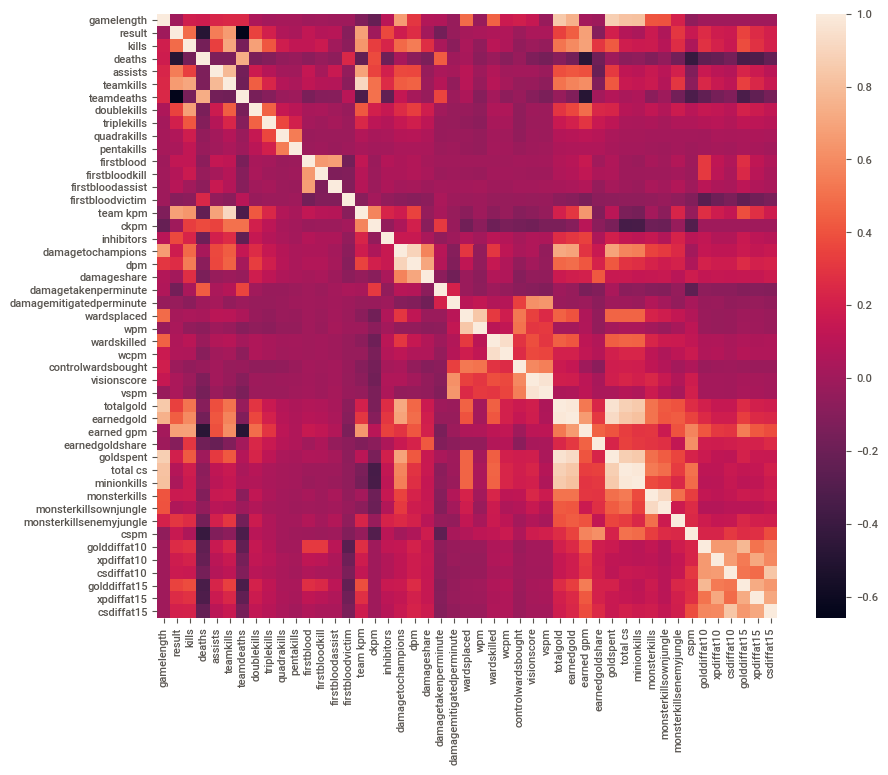

In [189]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [190]:
corrmid

,result
result,1.000000e+00
earned gpm,6.775126e-01
team kpm,6.770981e-01
teamkills,6.592332e-01
assists,5.502059e-01
kills,4.856321e-01
earnedgold,4.369562e-01
inhibitors,3.661220e-01
doublekills,3.511587e-01
golddiffat15,3.505256e-01


From the correlation matrix, we can determine which factors are the most relevant to a win are:
-earned gpm
-team kpm
-team kills 
-assists
-kills
-earned gold
-inhibitors
-double kills
-gold diff at 15
-total gold

We can also see that there is a negative correlation to:
-team deaths
-deaths

We can make a dataset that only take into account these factors.

In [195]:
newmid = gamemid[['earned gpm', 'team kpm', 'teamkills', 'assists', 
                  'kills', 'earnedgold', 'inhibitors', 'doublekills', 
                  'golddiffat15', 'totalgold', 'teamdeaths', 'deaths', 'result']]

In [196]:
newmid

,earned gpm,team kpm,teamkills,assists,kills,earnedgold,inhibitors,doublekills,golddiffat15,totalgold,teamdeaths,deaths,result
12559,188.3268,0.2067,7,2,1,6378.0,0.0,0.0,-691.0,10543,23,5,0
12566,236.9620,0.3094,11,6,3,8424.0,3.0,0.0,-402.0,12781,3,0,1
12571,200.6751,0.0844,3,3,0,7134.0,0.0,0.0,402.0,11491,11,2,0
12542,187.8177,0.2398,10,6,1,7832.0,0.0,0.0,-713.0,12890,13,2,0
12547,276.7386,0.3118,13,4,6,11540.0,0.0,1.0,713.0,16598,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,292.2885,0.4161,15,7,3,10537.0,0.0,0.0,1039.0,15225,8,0,1
17851,224.8629,0.3949,18,13,4,10250.0,1.0,0.0,556.0,16105,19,3,1
17822,450.7415,0.4634,15,7,6,14589.0,0.0,2.0,560.0,18826,6,0,1
17827,254.6138,0.1854,6,4,1,8241.0,0.0,0.0,-560.0,12478,15,1,0


Now we have a clean dataset of relevant information that we can use to train our model.